# Ejercicio 1 - Algebra Lineal

## Instrucciones: En una libreta de Jupyter, calcula la SVD de la matriz A = [[1, 2], [2, 3]]. Grafica el efecto sobre el conjunto de los vectores en R2 de longitud 1 (el círculo de centro [0, 0] y radio 1) al aplicarle VT luego Σ y luego U. Compara el efecto de aplicarle al círculo directamente A.


### Se cargan libretas para el análisis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definimos matriz inicial. En este caso A.

In [3]:
A = [[1,2],[2,3]]

In [4]:
print(A)

[[1, 2], [2, 3]]


### Con la ayuda de Numpy y la función linalg.svd hacemos la descomposición en valores singulares de la matriz A.

In [5]:
u, s, v = np.linalg.svd(A)

In [6]:
print(u,s,v)

[[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]] [4.23606798 0.23606798] [[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]


### Los valores singulares nos indican:

### u = matriz unitaria ortogonal

### s = vectores singulares

### v = matriz unitaria ortogonal v transpuesta

### Sabemos por lo que hemos visto en clase que se debe de cumplir con la siguiente igualdad:

A = U Σ VT

### Utilizamos la función de producto punto (dot) de Numpy, le asignamos estos valores a la matriz

B

In [9]:
B = np.dot(u, np.dot(np.diag(s), v))

### Imprimimos las matrices A y B para comprobar que son iguales

In [10]:
print(A,B)

[[1, 2], [2, 3]] [[1. 2.]
 [2. 3.]]


### Graficamos un círculo con los vectores de longitud 1 partiendo de [0,0]

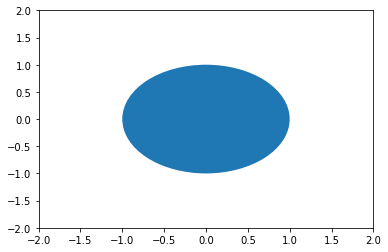

In [14]:
fig, ax = plt.subplots()

ax.set(xlim=(-2, 2), ylim = (-2, 2))

a_circle = plt.Circle((0, 0), 1)

ax.add_artist(a_circle)